In [31]:
library(tidyverse)

## Question 1

In [32]:
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 10, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

measure,site_name
10.291195,Site 1
11.388863,Site 1
10.649010,Site 1
11.477876,Site 1
10.438720,Site 1
10.522318,Site 2
9.955392,Site 2
11.484413,Site 2
8.408989,Site 2
10.225640,Site 2


In [33]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 10.84913

[1] 10.11935

In [34]:
tapply(complete_data$measure, complete_data$site_name, mean)

Site 1   Site 2 
10.84913 10.11935

## Question 2

In [35]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 10, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)

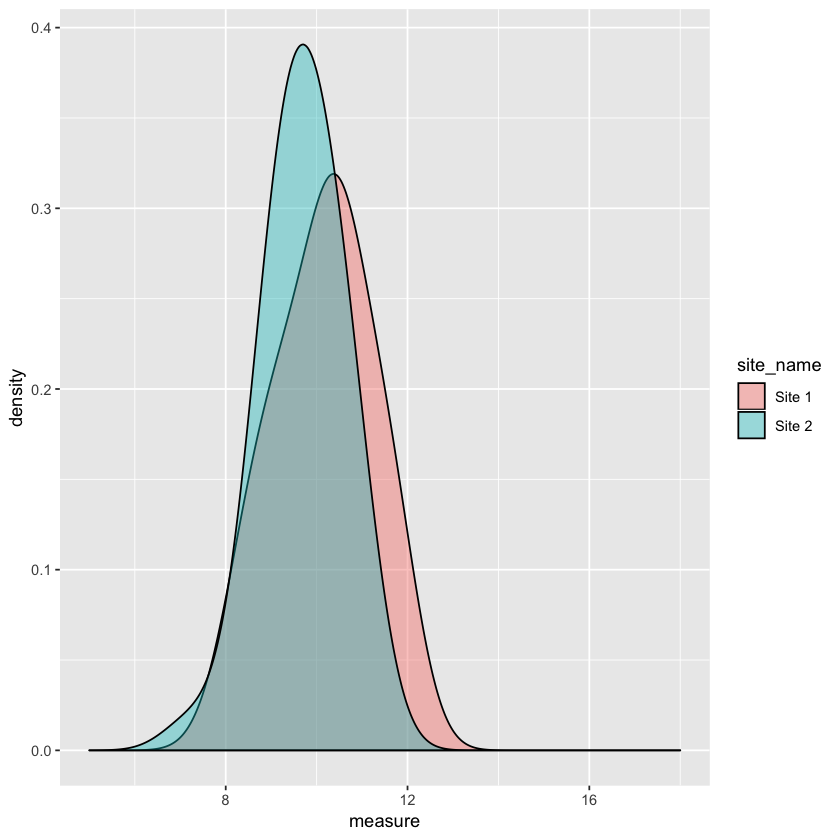

In [36]:
ggplot(complete_data, aes(x=measure, fill = site_name)) + 
  geom_density(alpha = 0.4, bw =0.60) + 
  xlim(5,18)

In [37]:
t.test(data_1$measure, data_2$measure, )


	Welch Two Sample t-test

data:  data_1$measure and data_2$measure
t = 2.1064, df = 74.217, p-value = 0.03855
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02414693 0.86823685
sample estimates:
mean of x mean of y 
 10.14979   9.70360 


In [38]:
data = t.test(rnorm(40, 10, 1), rnorm(40, 10, 1))
str(data)

List of 10
 $ statistic  : Named num 0.0856
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 68.4
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 0.932
 $ conf.int   : num [1:2] -0.402 0.438
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 9.97 9.96
  ..- attr(*, "names")= chr [1:2] "mean of x" "mean of y"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ stderr     : num 0.211
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "rnorm(40, 10, 1) and rnorm(40, 10, 1)"
 - attr(*, "class")= chr "htest"


In [39]:
data$p.value

[1] 0.9320057

In [40]:
replicate(10,
    t.test(rnorm(40, 10, 1), rnorm(40, 10,1))$p.value
         ) < 0.05

[1] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE

In [41]:
passes_t_test = replicate(10000, 
    t.test(rnorm(40, 10, 1), rnorm(40, 10,1))$p.value
) < 0.05

In [42]:
sum(passes_t_test) / length(passes_t_test)

[1] 0.0497

## Quesiton 3

In [3]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
site_X = c(0.60, 0.19, 0.21)
site_Y = c(0.61, 0.19, 0.20)

In [6]:
species = c('P.lobata', 'P.lobata', 'M. capitata','M. capitata', 'P. meandrina', 'P. meandrina')
proportion = c(0.60, 0.61, 0.19, 0.19, 0.21, 0.20)
site = rep(c('Site_X', 'Site_Y'), 3)

coral_proportions = tibble(species, proportion, site)
coral_proportions

species,proportion,site
P.lobata,0.60,Site_X
P.lobata,0.61,Site_Y
M. capitata,0.19,Site_X
M. capitata,0.19,Site_Y
P. meandrina,0.21,Site_X
P. meandrina,0.20,Site_Y


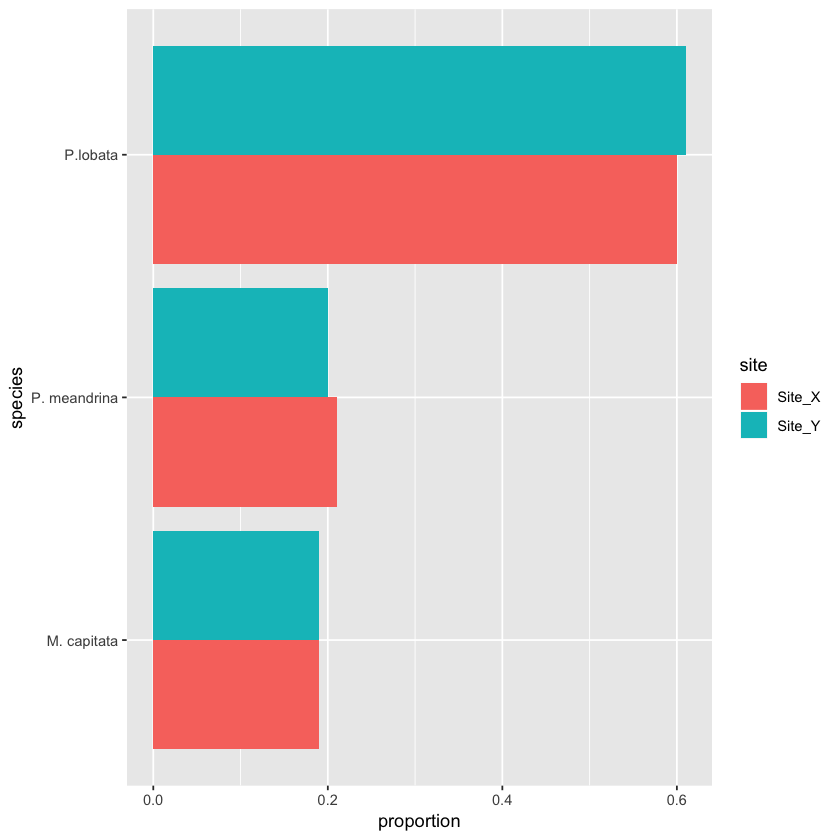

In [7]:
ggplot(coral_proportions, aes(fill=site, y = proportion, x = species)) +
    geom_bar(position="dodge", stat = "identity") + 
    coord_flip()

In [8]:
subtract = function(x){
    x[1] - x[2]
}

subtract(c(20, 15))

[1] 5

In [11]:
tapply(coral_proportions$proportion, coral_proportions$species, subtract)


M. capitata P. meandrina     P.lobata 
        0.00         0.01        -0.01

In [13]:
subtract_abs = function(x){
    abs(x[1] - x[2])
}

sum(tapply(coral_proportions$proportion, coral_proportions$species, subtract_abs))/2

[1] 0.01

In [14]:
rmultinom(1, 200, prob=c(0.60, 0.19, 0.21))

115
37
48


In [15]:
rmultinom(1, 200, prob=c(0.60, 0.19, 0.21))/200

0.560
0.215
0.225


In [18]:
sampleOneIteration = function(x){
    true_proportions = c(0.60, 0.19, 0.21)
    sample_proportions = rmultinom(1, 200, prob=c(0.60, 0.19, 0.21))/200
    sample_tvd = sum(abs(true_proportions - sample_proportions))/2
    sample_tvd
}
sampleOneIteration()

[1] 0.07

In [19]:
tvds = replicate(1000, sampleOneIteration())

In [20]:
observed_stat = sum(tapply(coral_proportions$proportion, coral_proportions$species, subtract_abs))/2

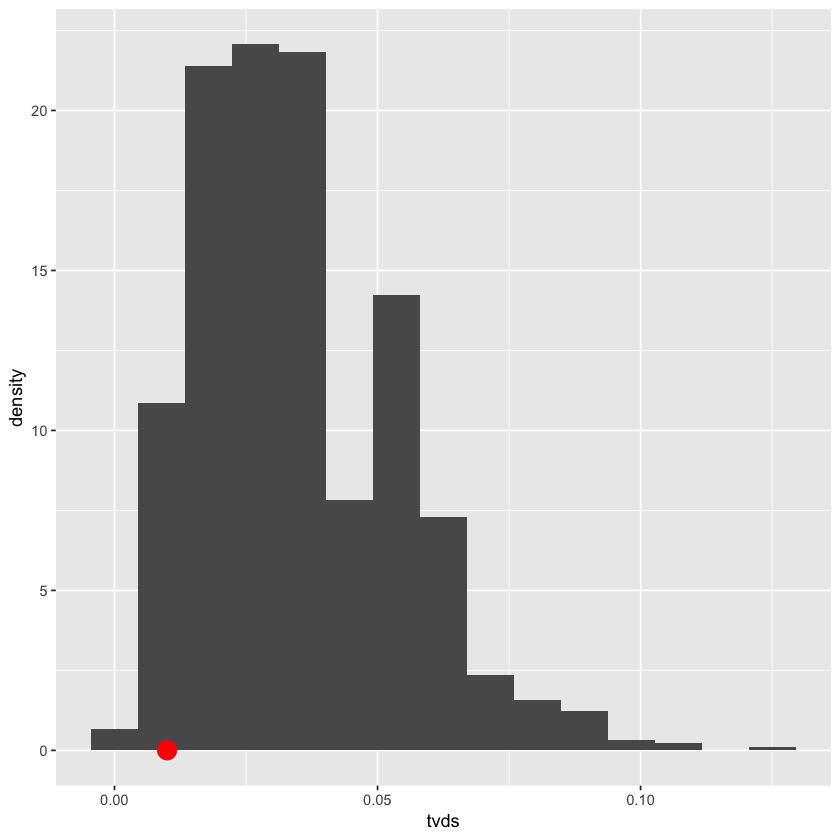

In [22]:
 ggplot()+ 
  geom_histogram(aes(tvds, ..density..), bins = 15) +
  geom_point(aes(observed_stat, 0), size=5, color="red")

In [23]:
p_value = sum(tvds > observed_stat)  / length(tvds)
p_value


[1] 0.942

In [ ]:
## what does this tell us? The two are not statistically different because P > 0.05